# Overview of the Data

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('factbook.db')

q1 = "select * from sqlite_master where type='table';"
pd.read_sql_query(q1,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [11]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Summary Statistics

In [4]:
q3 = '''
select min(population) min_pop, max(population) max_pop, 
min(population_growth) min_pop_grwth, max(population_growth) max_pop_grwth 
from facts
'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_grwth,max_pop_grwth
0,0,7256490011,0.0,4.02


# Exploring Outliers

In [5]:
q5 = '''
select * from facts
where population = (select min(population) from facts)
'''
pd.read_sql_query(q5,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
q5 = '''
select * from facts
where population = (select max(population) from facts)
'''
pd.read_sql_query(q5,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


 - Antarctica has zero population
 - The world has a population of 7.2 billion

# Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f381aa1e358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f38120b95c0>]], dtype=object)

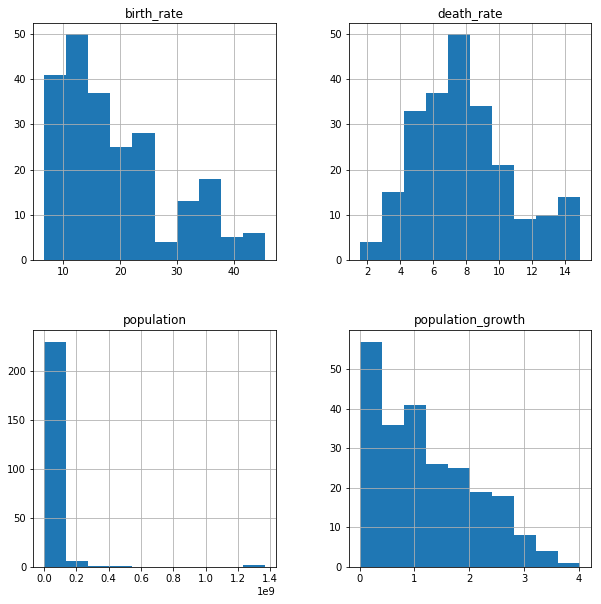

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(figsize=(10,10))

# Which Countries Have the Highest Population Density?

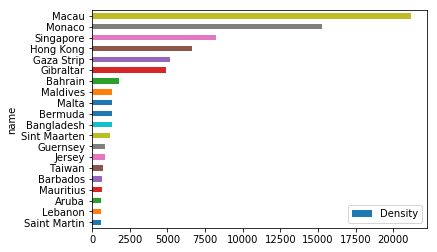

In [15]:
q7 = '''
select name, cast(population as float)/cast(area_land as float) Density
from facts
order by Density desc
limit 20
'''
pd.read_sql_query(q7,conn).sort_values('Density',ascending=True).plot.barh(y='Density',x='name')

# Which Countries Have the Highest Ratios of water to Land?

In [9]:
q8 = '''
select name ,cast(area_water as float)/cast(area_land as float) water_to_land
from facts
order by water_to_land desc
limit 20
'''
pd.read_sql_query(q8,conn)

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240
